# Tugas Python 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./Dataset/london_crime_by_lsoa.csv') # load dataset

In [112]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [96]:
# menghitung jumlah kasus kejahatan berdasarkan kategori
df['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [10]:
df.shape # untuk mengetahui jumlah baris dan kolom

(13490604, 7)

In [16]:
# describe() untuk mengetahui statistik deskriptif dari data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [5]:
# mengecek nilai yang hilang
df.isnull().values.any()
# dihasilkan nilai False, artinya tidak ada nilai yang hilang jadi tidak perlu dilakukan penghapusan data

False

## area plot

In [103]:
# membuat top 5 daerah dengan jumlah kasus kejahatan tertinggi sampai terendah
# mengurutkan dari jumlah kasus kejahatan tertinggi sampai terendah
a = df['borough'].value_counts().sort_values(ascending=False).head(5)
a

Croydon    602100
Barnet     572832
Ealing     549396
Bromley    523908
Lambeth    519048
Name: borough, dtype: int64

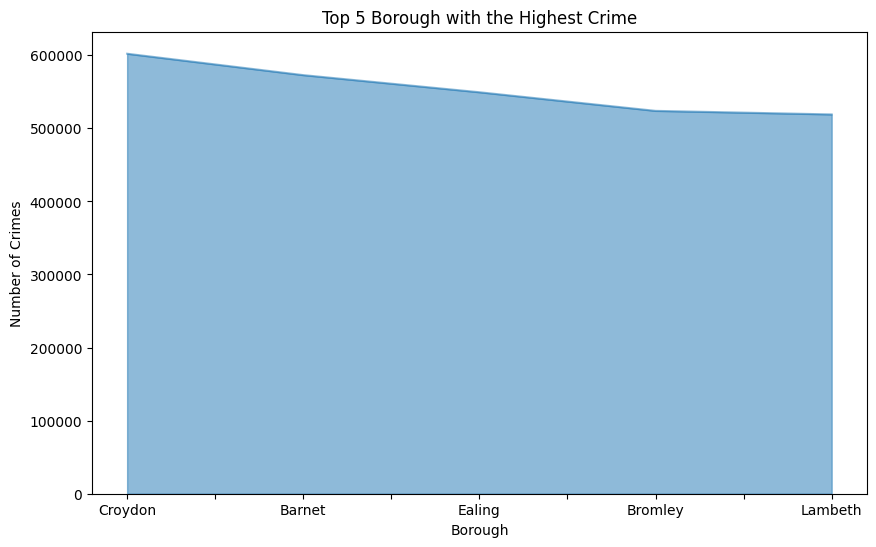

In [104]:
# visualisasi data area plot berdasarkan borough
# area plot
a.plot(kind='area', figsize=(10, 6), stacked=False)
plt.title('Top 5 Borough with the Highest Crime')
plt.ylabel('Number of Crimes')
plt.xlabel('Borough')
plt.show()

## histogram

In [91]:
# histogram untuk mengetahui distribusi data
df['month'].head()

0    11
1    11
2     5
3     3
4     6
Name: month, dtype: int64

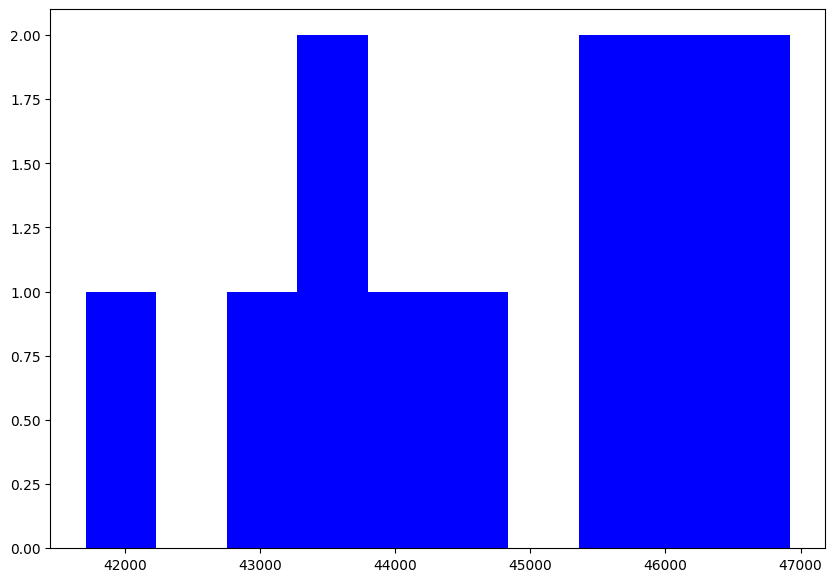

In [90]:
# membuat histogram
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(avg_crime_per_month, color='blue')
plt.show()

## bar chart

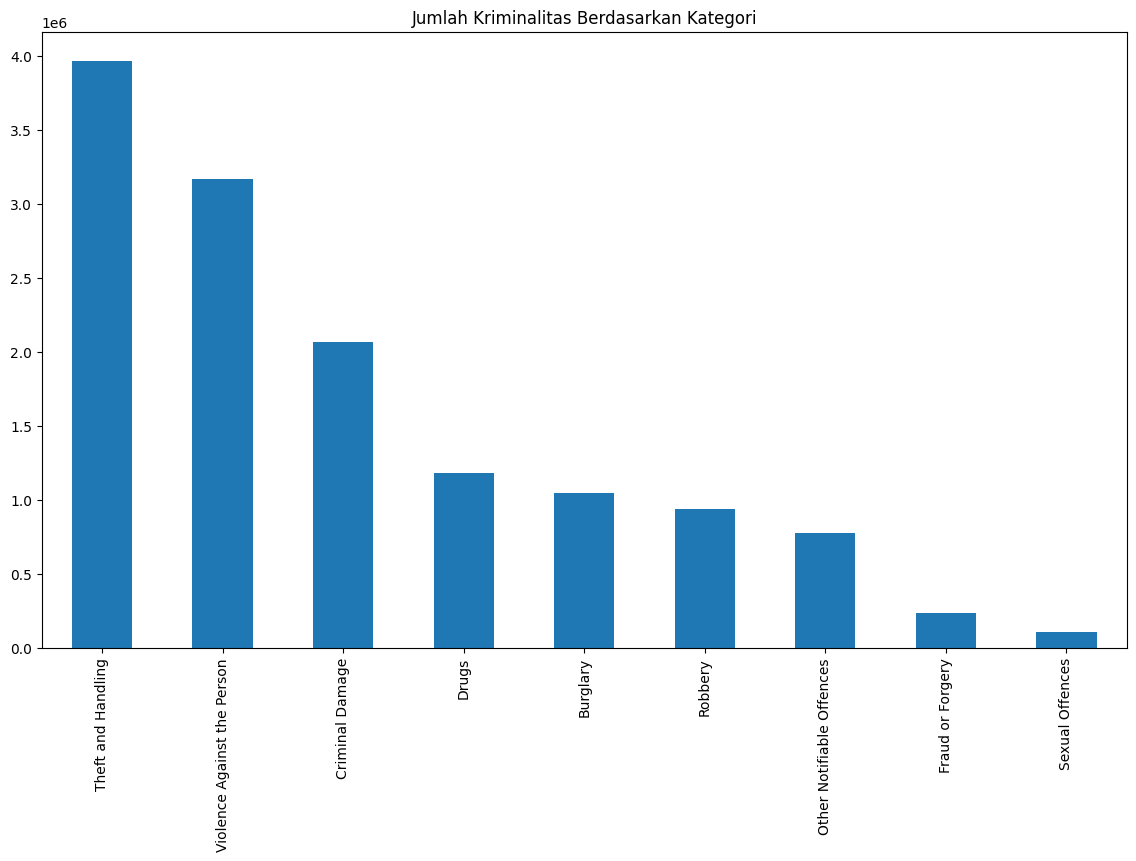

In [105]:
# 
ax = df['major_category'].value_counts().plot(kind='bar', figsize=(14,8), title="Jumlah Kriminalitas Berdasarkan Kategori")

## pie chart

In [110]:
# membuat pie chart

# membuat group by untuk mengetahui jumlah kasus kejahatan berdasarkan kategori
df.groupby('major_category').size()

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

<Axes: title={'center': 'Jumlah Kriminalitas dari tahun 2008-2016 Berdasarkan Kategori'}, ylabel='None'>

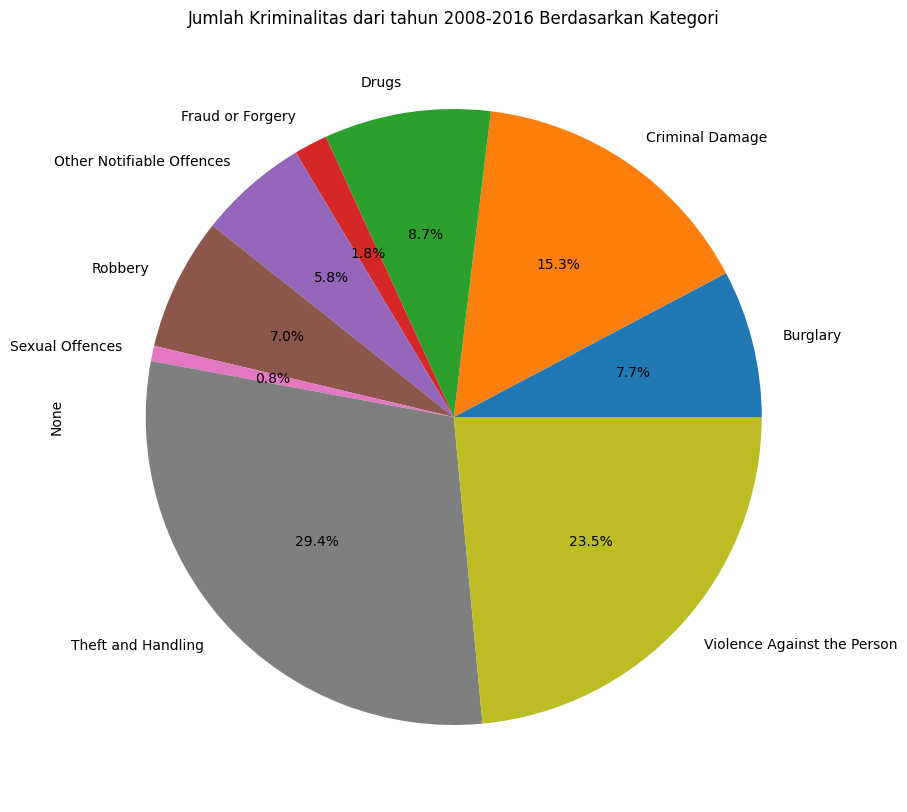

In [167]:
# membuat pie chart berdasarkan kategori kejahatan dari tahun 2008-2016
df.groupby('major_category').size().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Jumlah Kriminalitas dari tahun 2008-2016 Berdasarkan Kategori')

In [ ]:
# arti dari diagram pie chart diatas adalah bahwa kriminalitas yang paling banyak terjadi adalah kriminalitas yang berkaitan dengan kejahatan pribadi dan keuangan, yaitu sebesar 23.5% dari total kriminalitas yang terjadi di London dari tahun 2008-2016.

## box plot

In [137]:
# membuat data frame baru untuk mengetahui jumlah kasus kejahatan berdasarkan kategori dan bulan
df2 = df.groupby(['major_category', 'month']).size().reset_index(name='count')
df2

,major_category,month,count
0,Burglary,1,86967
1,Burglary,2,86967
2,Burglary,3,86967
3,Burglary,4,86967
4,Burglary,5,86967
...,...,...,...
103,Violence Against the Person,8,264312
104,Violence Against the Person,9,264312
105,Violence Against the Person,10,264312
106,Violence Against the Person,11,264312


{'whiskers': [<matplotlib.lines.Line2D at 0x23b0adc3fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x23b0adcc7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b0add2df0>],
 'medians': [<matplotlib.lines.Line2D at 0x23b0adc3d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b0adea130>],
 'means': []}

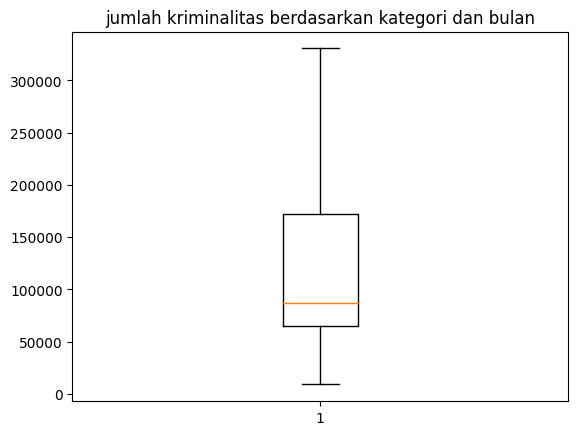

In [143]:
fig1, ax1 = plt.subplots()
ax1.set_title('jumlah kriminalitas')
ax1.boxplot(df2['count'])

## scatter plot

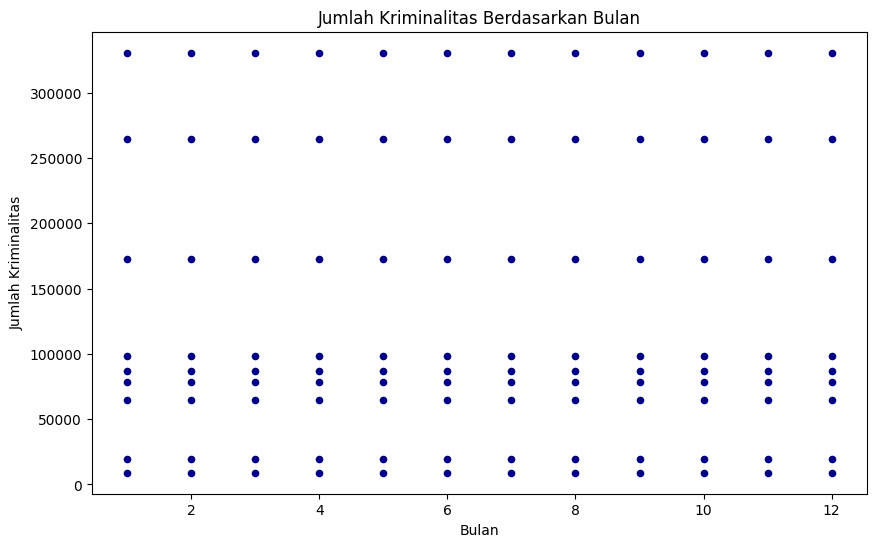

In [172]:
# scatter plot untuk mengetahui hubungan antara jumlah kejahatan dengan jumlah kejahatan yang terjadi pada bulan yang sama
df2.plot(kind='scatter', x='month', y='count', figsize=(10, 6), color='darkblue')
plt.title('Jumlah Kriminalitas Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kriminalitas')
plt.show()

In [173]:
# hasil dari scatter plot diatas adalah bahwa jumlah kejahatan yang terjadi pada bulan yang sama tidak memiliki hubungan yang kuat

In [168]:
# mengubah angka menjadi nama bulan
df3 = df2.replace({'month': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}})
df3

,major_category,month,count
0,Burglary,January,86967
1,Burglary,February,86967
2,Burglary,March,86967
3,Burglary,April,86967
4,Burglary,May,86967
...,...,...,...
103,Violence Against the Person,August,264312
104,Violence Against the Person,September,264312
105,Violence Against the Person,October,264312
106,Violence Against the Person,November,264312


c:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


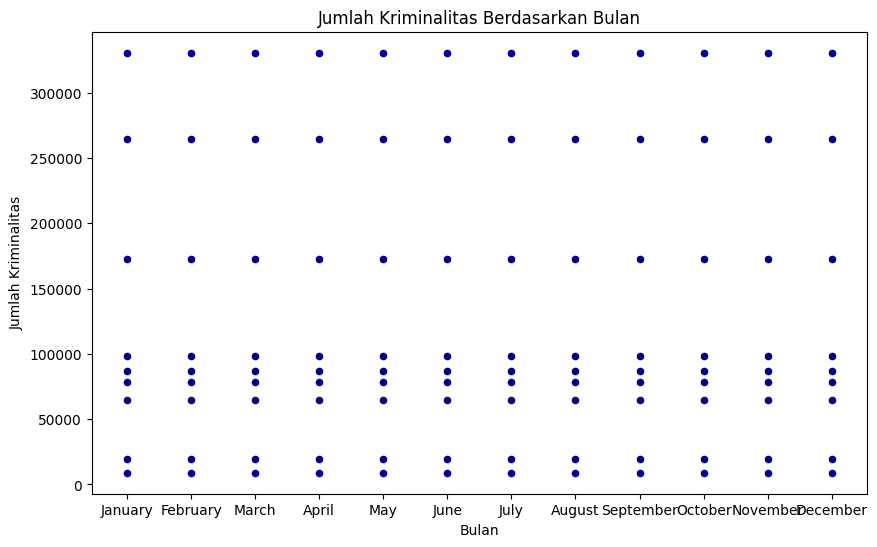

In [195]:
# scatter plot
# mencari hubungan antara count dengan value
df3.plot(kind='scatter', x='count', y='value', figsize=(10, 6), color='darkblue')


arti dari scatter plot diatas adalah bahwa jumlah kejahatan yang terjadi pada bulan yang sama tidak memiliki hubungan yang kuat

## word cloud

In [1]:
# word cloud
from wordcloud import WordCloud, STOPWORDS # import library wordcloud
import re 

In [5]:
# menggabungkan semua kata yang ada di kolom major_category
all_text = " ".join(df['borough'].values)

In [7]:
wc = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')

In [8]:
wc.generate(all_text)

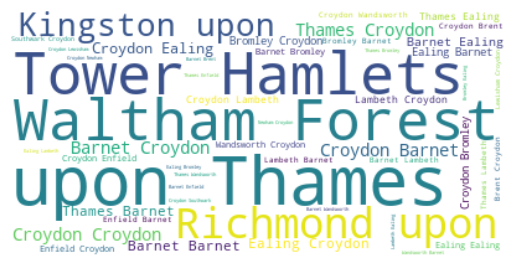

In [12]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## follium maps

In [13]:
# folium map
import folium # import library folium

In [30]:
# membuat data frame baru untuk memasukan latitude dan longitude dari setiap borough
borough = {
        'borough': ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
        'latitude': [51.5607, 51.6252, 51.4549, 51.5588, 51.4039, 51.5290, 51.5155, 51.3714, 51.5130, 51.6538, 51.4892, 51.5450, 51.4927, 51.6000, 51.5898, 51.5812, 51.5441, 51.4746, 51.5416, 51.5020, 51.4085, 51.4479, 51.4607, 51.4452, 51.4014, 51.5077, 51.5590, 51.4479, 51.5035, 51.3618, 51.5099, 51.5908, 51.4567],
        'longitude': [0.1557, -0.1517, 0.1505, -0.2817, 0.0198, -0.1255, -0.0922, -0.0977, -0.3089, -0.0799, 0.0648, -0.0553, -0.2339, -0.1119, -0.3346, 0.1837, -0.4760, -0.3680, -0.1022, -0.1947, -0.3064, -0.0203, -0.1163, -0.0209, -0.1958, 0.0469, 0.0741, -0.3260, -0.0804, -0.1945, -0.0059, -0.1910, -0.1910]}

In [31]:
borough_df = pd.DataFrame(borough)

In [44]:
# borough_df to csv
borough_df.to_csv('borough.csv', index=False)

In [35]:
# pndas series
borough_df

,borough,latitude,longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,City of London,51.5155,-0.0922
7,Croydon,51.3714,-0.0977
8,Ealing,51.5130,-0.3089
9,Enfield,51.6538,-0.0799


In [52]:
# membuat data frame untuk mengetahui jenis kejahatan yang paling banyak terjadi di setiap borough
df4 = df.groupby(['borough', 'major_category']).size().reset_index(name='count')
df4

,borough,major_category,count
0,Barking and Dagenham,Burglary,23760
1,Barking and Dagenham,Criminal Damage,46764
2,Barking and Dagenham,Drugs,26244
3,Barking and Dagenham,Fraud or Forgery,7236
4,Barking and Dagenham,Other Notifiable Offences,17496
...,...,...,...
290,Westminster,Other Notifiable Offences,21924
291,Westminster,Robbery,25056
292,Westminster,Sexual Offences,3672
293,Westminster,Theft and Handling,107136


In [45]:
# membuat map dengan lokasi borough
map = folium.Map(location=[51.5074, 0.1278], zoom_start=10)

In [42]:
# membuat feature group untuk menampilkan marker
incident = folium.map.FeatureGroup() 

In [43]:
# menampilkan marker
for lat, lng, in zip(borough_df.latitude, borough_df.longitude):
    incident.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# menambahkan incident ke map
map.add_child(incident)

In [50]:
# menambahkan pop up nama kota
for lat, lng, borough in zip(borough_df.latitude, borough_df.longitude, borough_df.borough):
    folium.Marker([lat, lng], popup=borough).add_to(map)

In [51]:
map